# Tutorial de Big Data
## Tutorial 8

**Objetivo:** entender la "diferencia" entre clasificación y regresión. Utilizar Bayes, análisis de discriminante lineal y KNN. Análisis de la curva ROC.

Veremos:
- Clasificación
- Medidas de precisión
- Curva de ROC
- Análisis de discriminante lineal 
- KNN



In [7]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


Nueva situación: 'y' es una variable cualitativa. ¿Qué hacer? 

- ¿Por qué en el caso de 'y' cualitativa la regresión linear no es una opción apropiada?

1. Puede no haber una forma de tranformar una variable cualitativa con más de 2 niveles en una variable cuantitaiva que nos 'sirva' para una regresión lineal: puede que 'y' no tenga un orden. Por ejemplo, si la 'y' hace referencia a enfermedades. ¿Cómo asignarles un valor? Implicaría asumir un orden y también que la diferencia entre las enfermedades es equivalente...
2. En el caso binario (2 niveles) podemos transformar la variable a una variable numérica. Por ejemplo: y=1 pobre e y=0 no pobre. Sin embargo, con una regresión  lineal podría ocurrir que generemos predicciones fuera del intervalo [0, 1] y por ende no podremos interpretarlo como probabilidades...

Entonces...
*Vamos a clasificar 'y' (variable cualitativa) en base a 'x'*

- ¿Estamos ante un caso de aprendizaje supervisado o no supervisado? 

Vamos a trabajar con bases donde tenemos el output esperado. Por lo tanto, nuestros modelos serán casos de aprendizaje supervisado.
     
- ¿Qué es el clasificador de Bayes? 

Clasificar según el estado más probable minimiza el riesgo esperado. Por ej: si la probabilidad de que una persona me pague un credito es mayor que 0.5, predigo que pagará el credito. 

*Modelos:*
    
1. Regresión logística 
2. Análisis de discriminante lineal
3. KNN

Vamos a construir un clasificador con los datos de training. Queremos que funcione bien no solo en el conjunto de entrenamiento sino también en el conjunto de test.

#### REGRESIÓN LOGÍSTICA CON SCIKIT-LEARN

Algoritmo de clasificación que se usa para predecir la probabilidad de una variable dependiente categórica. El modelo logit predice P(Y=1) como una función de X. Se modela la probabilidad de una forma tal que los outputs serán valores entre 0 y 1 para cualquier valor de X.


Ahora utilizaremos la función [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Se pueden proveer muchos parámetros opcionales para esta función:

- **fit_intercept**: Boolean que decide si calcular el intercepto (True) o considerarlo igual a cero (False). Por default es True.
- **penalty**: Se determina se usar algún tipo de regularización. Posibles valores: ‘l1’, ‘l2’, ‘elasticnet’, None. El valor por defecto es default es ‘l2’, es decir que se aplica regularización.


In [8]:
# Creamos un vector de x e y para fines del ejemplo.
np.random.seed(25)
X = np.random.normal(size=100)
print(X)

# Recordatorio: para la regresión lineal creamos un vector aleatorio así:
# y = 2 + 3*x + np.random.rand(50, 1)
# Ahora lo crearemos de la siguiente forma para que tenga más sentido usar una regresión logística
y = (X > 0).astype(float) # si no pusiera astype sería un array de True y False

# Alteramos los valores de X y sumamos variación con el "error"
X[X > 0] *= 4
X += .5 * np.random.normal(size=100)
X = X.reshape((-1, 1)) # para tenerlo como columna
#print(X)



[ 0.22827309  1.0268903  -0.83958485 -0.59118152 -0.9568883  -0.22232569
 -0.61991511  1.83790458 -2.05323076  0.86858305 -0.92073444 -0.23231186
  2.1529569  -1.33466147  0.07637965 -1.24608928  1.20227231 -1.04994158
  1.05661011 -0.41967767  2.29484234 -2.59448738  2.8227564   0.68088892
 -1.57769345 -1.97625359  0.53333982 -0.29086971 -0.51351967  1.98262608
  0.22600105 -1.83990496  1.60767083  0.38829194  0.39973206  0.4054766
  0.21700177 -0.6334391   0.24662153 -1.93954552  0.11405963 -1.8853414
  0.24308048 -0.70548067  0.36462762 -0.50295216 -0.22575155 -0.56553773
  0.10339501  2.01840842  1.09424827  1.6624344  -0.62745348  1.62119964
  1.17813267 -0.37487875 -0.54432898  0.28776118 -0.20581999  1.18998786
  0.72892688 -0.22204012 -1.62270578  0.31254055 -1.16042141  0.31355968
  0.47199786  0.57786171  0.50540675 -0.62648777 -0.34636933 -2.06594183
  0.76893629  1.12886631  0.16692354 -0.96725539  0.49199625 -0.55085717
 -0.08469407  1.96756834 -0.06267511 -0.85113578  0.4

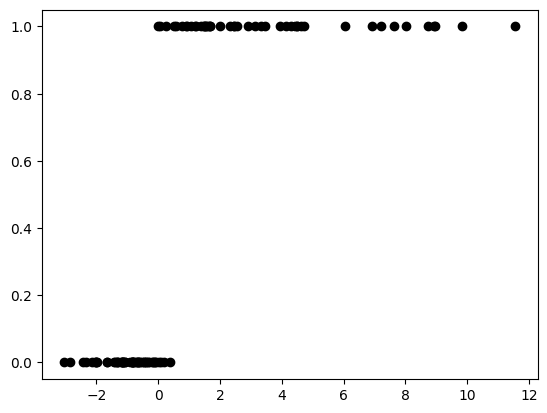

In [9]:
# Graficamos para ver si nos quedó un vector que tenga sentido para una regresión logística
plt.scatter(X, y, color='black', zorder=20)

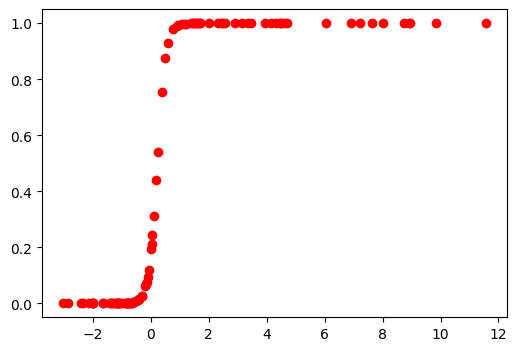

In [10]:
# Ajustamos el clasificador con el método fit() 
log_reg = LogisticRegression(penalty=None).fit(X, y)

# Predicciones (probabilidad)
y_pred_score = log_reg.predict_proba(X)[:,1]   # Por qué seleccionamos la columna 1?

# Gráfico de resultados
plt.figure(figsize=(6, 4))
plt.scatter(X, y_pred_score, color='red', zorder=20)
plt.show()

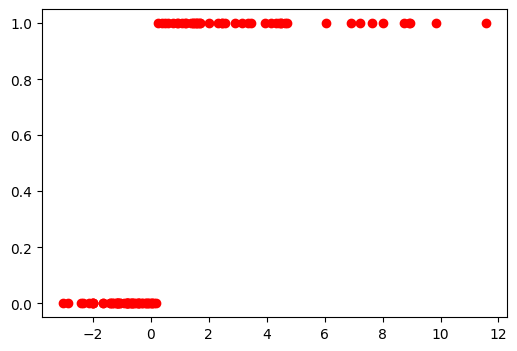

In [11]:
# Convertimos las probabilidades en Y con valores 1 o 0 (usando el clasificador de Bayes)
y_pred = np.where(y_pred_score > 0.5, 1, y_pred_score)
y_pred = np.where(y_pred_score <= 0.5, 0, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y_pred, color='red', zorder=20)
plt.show()

col_0  0.0  1.0
row_0          
0.0     54    0
1.0      0   46


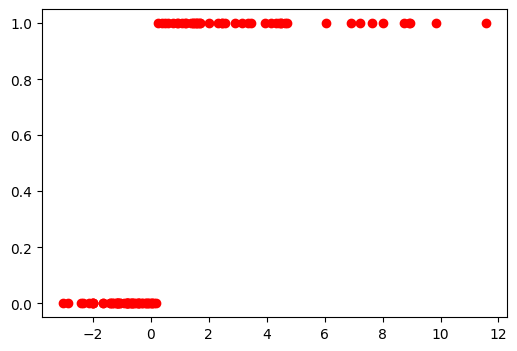

In [12]:
# Equivalente a lo anterior es usar predict() (clasifica en 0s y 1s)
y_pred_2 = log_reg.predict(X)
print(pd.crosstab(index=y_pred, columns=y_pred_2))

# Y graficamos los resultados
plt.figure(figsize=(6, 4))
plt.scatter(X, y_pred_2, color='red', zorder=20)
plt.show()

#### REGRESIÓN LOGÍSTICA CON STATSMODELS

In [13]:
# Podemos repetirlo con statsmodels
# Primero agregamos la columna de 1s y hacemos el ajuste
X_sm = sm.add_constant(X) 
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()
print(result.summary2()) 
#También podríamos vn: print(result.summary2().as_latex())


Optimization terminated successfully.
         Current function value: 0.070883
         Iterations 12
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.897     
Date:               2024-05-26 19:29 AIC:              18.1766   
No. Observations:   100              BIC:              23.3869   
Df Model:           1                Log-Likelihood:   -7.0883   
Df Residuals:       98               LL-Null:          -69.135   
Converged:          1.0000           LLR p-value:      8.0400e-29
No. Iterations:     12.0000          Scale:            1.0000    
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -1.4736     0.7469   -1.9730   0.0485   -2.9376   -0.0097
x1         6.9142     2.6585    2.6008   0.0093    1.7038

In [14]:
y_pred_score_sm = result.predict(X_sm)

# El método where requiere una condición como primer parámetro, 
# que cuando es True devuelve el segundo valor y cuando es False devuelve tercero. 
y_pred_sm = np.where(y_pred_score_sm > 0.5, 1, y_pred_score_sm)
y_pred_sm = np.where(y_pred_score_sm <= 0.5, 0, y_pred_sm)

print(pd.crosstab(index=y_pred, columns=y_pred_sm))

col_0  0.0  1.0
row_0          
0.0     54    0
1.0      0   46


El método predict() de statsmodels, ¿a qué metodo se parece en scikit-learn?

# Medidas de precisión 

Dependiendo la prioridad del problema seguramente vamos a querer usar diferentes métricas. Scikit learn tiene muchas métricas que pueden explorar en el módulo [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

- Sensitivity o Recall o True Positive Rate: TP rate = TP/P
- Specificity o True Negative Rate: 1 - FP rate = TN/N
- False Positive Rate o False Alarm Rate: FP rate = FP/N
- False Negative Rate: FN rate = FN/P
- Precision o Positive Predicted Value: TP/(TP+FP)
- Accuracy: (TP+TN)/(P+N)

Nota: Cuidado con las traducciones! "Accuracy" lo pueden encontrar traducido como "precisión" y eso puede generar confusión con la medida "precision" (o positive predicted value). Mi sugerencia es traducir "accuracy" como "exactitud".


[Matriz de confusión](https://www.unite.ai/what-is-a-confusion-matrix/)
<center>
<img src="https://www.unite.ai/wp-content/uploads/2019/12/Preventive_Medicine-e1576294312614.png" width="1000">

</center>

In [15]:
matriz_confusion = confusion_matrix(y, y_pred)

print('Confusion Matrix:')
print(matriz_confusion) 
print('Accuracy Score:', accuracy_score(y, y_pred))

# Nota importante: en Python la matriz de confusión tiene:
# en las filas los valores ciertos
# y en las columnas los valores predichos

Confusion Matrix:
[[52  1]
 [ 2 45]]
Accuracy Score: 0.97


La matriz de confusión de sklearn pone en las filas las Y reales y las columnas las Y predichas. Muestra así los valores:

                               predicción
                         real   tn fp
                                fn tp

In [16]:
# Para los casos donde la predición (la y) es binaria podemos usar lo siguiente:
tn, fp , fn, tp = confusion_matrix(y, y_pred).ravel()   # Ravel transforma la matriz en un 1D array
# equivalente a: [tn, fp] , [fn, tp] = confusion_matrix(y, y_pred_2)

print("Verdadero 0: ", tn)
print("Falso 1: ", fp)
print("Falso 0: ", fn)
print("Verdadero 1: ", tp)

Verdadero 0:  52
Falso 1:  1
Falso 0:  2
Verdadero 1:  45


In [17]:
confusion_matrix(y, y_pred).ravel()

array([52,  1,  2, 45])

In [18]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, y_pred)
print('Accuracy: %f' % accuracy)

# recall: tp / p = tp / (tp + fn)
recall = recall_score(y, y_pred)
print('Recall: %f' % recall)

Accuracy: 0.970000
Recall: 0.957447


### Curva ROC                  
ROC: Receiver Operating Characteristics
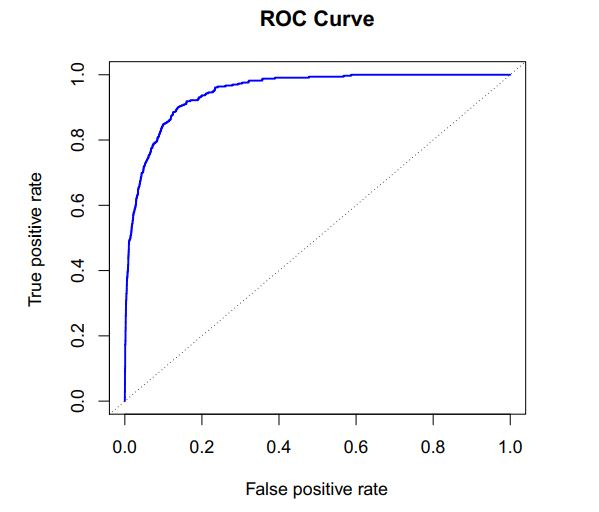

Veremos como utilizar las funciones:

-  [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve): computa la curva de ROC
- [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score): Computa el area bajo la curva de ROC de los scores predichos.
- [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay): Sirve para visualizar la curva de ROC. Con el mismo fin existe [plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)

In [19]:
auc = roc_auc_score(y, y_pred_score)
print('AUC: %.3f' % auc)

AUC: 0.997


In [20]:
fpr, tpr, thresholds = roc_curve(y, y_pred_score)
np.set_printoptions(suppress = True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

Thresholds: [       inf 1.         0.87507893 0.75406877 0.54074439 0.31342867
 0.2445114  0.21133263 0.19241401 0.        ]
FPR: [0.         0.         0.         0.01886792 0.01886792 0.05660377
 0.05660377 0.0754717  0.0754717  1.        ]
TPR: [0.         0.21276596 0.93617021 0.93617021 0.95744681 0.95744681
 0.9787234  0.9787234  1.         1.        ]


Ojo! Notar que Entre los umbrales hay uno que toma valor 2. El rango del umbral es de 0 a 1, ya que es una probabilidad. Pero scikit learn suma 1 al último valor en el array de thresholds (Notar que el anteúltimo umbral es 1, y el último es 2).

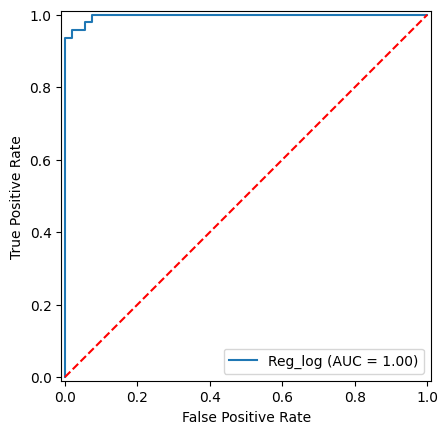

In [21]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

Repitamos el ejercicio partiendo la base en train y test

In [22]:
# Entrenaremos con el 70% de la base de datos y el resto se usarán para testear 
# el modelo obtenido
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [23]:
# Estimo:
# Ajustamos el clasificador con el metodo fit() 
log_reg = LogisticRegression(penalty=None).fit(X_train, y_train)
y_test_pred_score = log_reg.predict_proba(X_test)[:,1]
y_test_pred = log_reg.predict(X_test)


In [24]:
# AUC y ROC
auc = roc_auc_score(y_test, y_test_pred_score)
print('AUC: %.4f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_score)


AUC: 0.9952


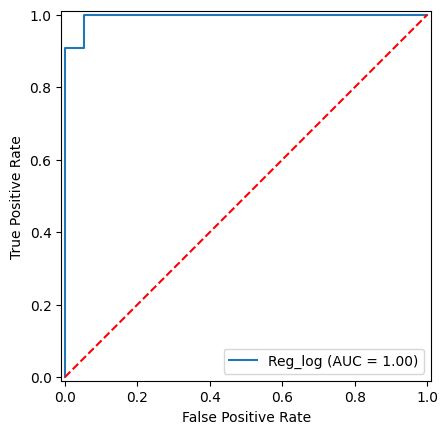

In [25]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

### Análisis discriminante lineal

[LinearDiscriminantAnalysis()](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html): Es un clasificador que utiliza un límite lineal para distinguir las categorías, generado a través del ajuste de densidades condicionales de las clases y utilizando la regla de Bayes.

El modelo ajusta una densidad gaussiana a cada clase, asumiendo que todas las clases comparten la misma matriz de covarianza.

El modelo también se puede utilizar para reducir la dimensionalidad de la entrada proyectándola en las direcciones que aportan mayor distinción, para ello se utiliza el método `transform`.

Trabajaremos con el dataset de flores iris (muy usado para ejemplos de sklearn)
[The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)


In [26]:
iris = datasets.load_iris()
#print(type(iris))

In [27]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

Fuente: [Comparison of LDA and PCA 2D projection of Iris dataset](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

In [28]:
X = iris.data
y = iris.target
print(X, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [29]:
target_names = iris.target_names
target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
# Separamos la muestra en datos de entrenamiento y de validación 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=4) 

In [31]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [32]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda = lda.fit(X_train, y_train)

In [30]:
X_r = lda.transform(X_train)
X_r

array([[ 7.98977331,  0.70669925],
       [10.02868756, -2.61005777],
       [-1.37451389, -0.27973434],
       [-1.82965138,  0.38571257],
       [-4.58986491,  0.09899161],
       [ 8.51903266, -0.13359049],
       [-0.7708011 ,  1.66411724],
       [-8.73274298,  1.07869232],
       [-5.9145454 , -2.48935378],
       [-0.96339519,  0.68245715],
       [-1.19351238,  0.45711887],
       [ 7.02713443, -1.24261706],
       [ 0.07779425, -0.05868675],
       [-4.51638285,  2.22451472],
       [-2.09130903,  1.5296961 ],
       [ 7.74995925, -0.44262849],
       [-0.88079629,  0.11885684],
       [ 8.25054522,  0.06583919],
       [-0.78049797,  0.74012777],
       [-5.12692542, -0.6638907 ],
       [-3.00086954,  0.03398306],
       [-3.86822134, -1.24844409],
       [-1.52675639, -1.20360329],
       [ 7.80700031,  0.97609299],
       [-4.39650931,  0.25046387],
       [-5.67658847, -1.49552078],
       [ 7.98395349, -0.4139137 ],
       [-0.81216266,  1.78238521],
       [-7.2705565 ,

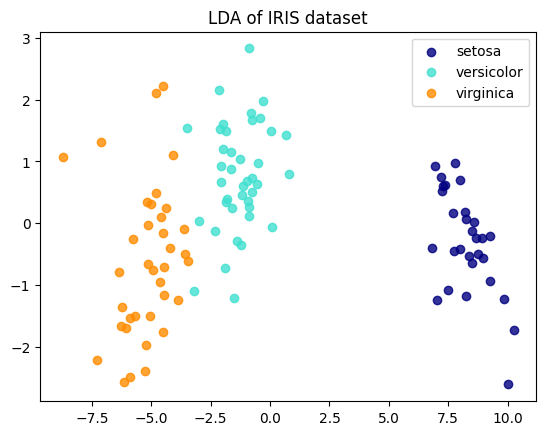

In [31]:
plt.figure()
# Graficar los puntos de cada clase. 
#Se toman las coordenadas de la primera y segunda columna de X_r, indexando los valores según y, la clase.  
plt.scatter(X_r[y_train == 0, 0], X_r[y_train == 0, 1], alpha=.8, color='navy', label='setosa')
plt.scatter(X_r[y_train == 1, 0], X_r[y_train == 1, 1], alpha=.8, color='turquoise', label='versicolor')
plt.scatter(X_r[y_train == 2, 0], X_r[y_train == 2, 1], alpha=.8, color='darkorange', label='virginica')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [32]:
# Predecimos con el modelo de Análisis discriminante lineal sobre las X test
y_test_pred_lda = lda.predict(X_test)

In [33]:
accuracy_lda = accuracy_score(y_test, y_test_pred_lda)
print("La exactitud del modelo es: %.2f" %accuracy_lda)

La exactitud del modelo es: 0.96


### KNN
[KNeighborsClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier): Clasificador de vecinos más cercanos

A continuación veremos un ejemplo de clasificación de las flores en la base de datos iris nuevamente y probaremos ajustando el parámetro k (cantidad de vecinos) para obtener el modelo con mayor precisión

Fuente: [MachineLearning — KNN using scikit-learn](https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75)

In [34]:
# Vamos a probar con distintos tamaños de k (cantidad de vecinos)
k_range = range(1,10)
scores = {}      # Para guardar la accuracy en un diccionario
scores_list = [] # Para guardar la accuracy en una lista
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        scores[k] = accuracy_score(y_test, y_pred_knn)
        scores_list.append(accuracy_score(y_test, y_pred_knn))

In [35]:
# Observemos el diccionario con las métricas
scores

{1: 0.9555555555555556,
 2: 0.9555555555555556,
 3: 0.9777777777777777,
 4: 0.9777777777777777,
 5: 0.9777777777777777,
 6: 0.9777777777777777,
 7: 0.9777777777777777,
 8: 0.9777777777777777,
 9: 0.9777777777777777}

Text(0, 0.5, 'Testing Accuracy')

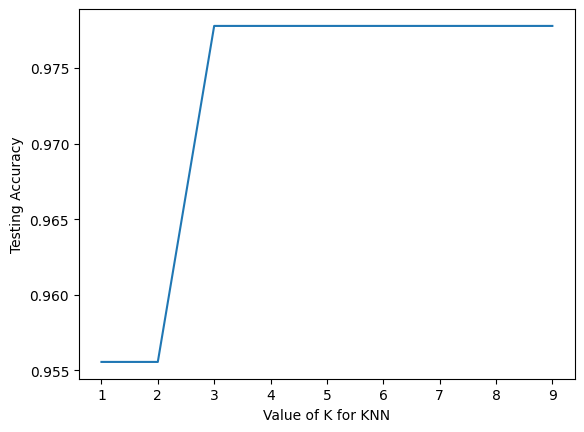

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

# Graficamos la precisión en base a la cantidad de vecinos
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Los valores de K entre 3 y 10 tienen la misma precisión, que es 97,77, por lo que podemos usar cualquier valor de esos. Elegiremos K = 3 como nuestro modelo final

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [38]:
y_test_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("La exactitud del modelo es: %.3f" %accuracy_knn)     

La exactitud del modelo es: 0.978


Otro ejemplo

Vamos a usar datos del S&P Stock Market. 
Esta base contiene los retornos porcentuales del S&P 500 stock index por 1250 días, desde inicios de 2001 hasta el final de 2005. Para cada fecha, tenemos:
- Lag1, Lag2,..., Lag5: retornos porcentuales de cada uno de los días anteriores.
- Volume: volumen de acciones negociadas (número de acciones diarias negociadas en miles de millones de dólares)
- Today: retorno porcentual de hoy
- Direction: variable binaria que toma valores "Down" y "Up" indicando si el mercado tuvo un retorno positivo o negativo.


In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from ISLP import load_data

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [40]:
# Cargamos los datos de Smarket.
smarket = load_data('Smarket')
smarket

Year   Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Today Direction
0     2001  0.381 -0.192 -2.624 -1.055  5.010  1.19130  0.959        Up
1     2001  0.959  0.381 -0.192 -2.624 -1.055  1.29650  1.032        Up
2     2001  1.032  0.959  0.381 -0.192 -2.624  1.41120 -0.623      Down
3     2001 -0.623  1.032  0.959  0.381 -0.192  1.27600  0.614        Up
4     2001  0.614 -0.623  1.032  0.959  0.381  1.20570  0.213        Up
...    ...    ...    ...    ...    ...    ...      ...    ...       ...
1245  2005  0.422  0.252 -0.024 -0.584 -0.285  1.88850  0.043        Up
1246  2005  0.043  0.422  0.252 -0.024 -0.584  1.28581 -0.955      Down
1247  2005 -0.955  0.043  0.422  0.252 -0.024  1.54047  0.130        Up
1248  2005  0.130 -0.955  0.043  0.422  0.252  1.42236 -0.298      Down
1249  2005 -0.298  0.130 -0.955  0.043  0.422  1.38254 -0.489      Down

[1250 rows x 9 columns]

In [41]:
print(smarket.head(5))
print('\nColumnas:\n', smarket.columns)

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up

Columnas:
 Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')


In [42]:
smarket.corr()

/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_20832/3443607407.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  smarket.corr()


Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000

<Axes: >

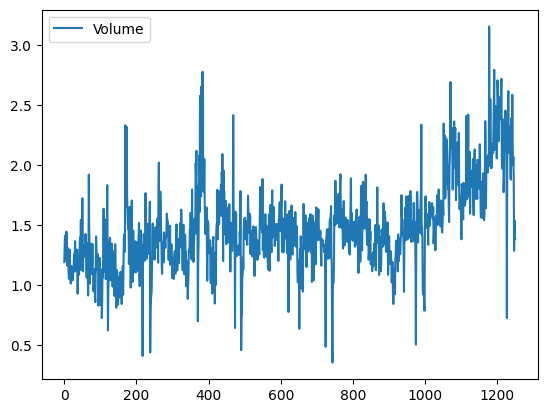

In [43]:
smarket.plot(y='Volume')

In [44]:
print(smarket['Direction'].value_counts())

print(smarket.groupby('Direction').mean())

Up      648
Down    602
Name: Direction, dtype: int64
                  Year      Lag1      Lag2      Lag3      Lag4      Lag5  \
Direction                                                                  
Down       2002.906977  0.050686  0.032297 -0.005525 -0.003342 -0.000844   
Up         2003.117284 -0.039691 -0.022444  0.008443  0.006261  0.011605   

             Volume     Today  
Direction                      
Down       1.469728 -0.857814  
Up         1.486273  0.802974  


Vamos a usar el modelo de **regresión logística** para predicir 'Direction' usando los lags 1 a 5 y Volume. 

In [46]:
y = smarket['Direction']
y = y.replace('Up', 1)
y = y.replace('Down', 0)
 
X = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X = sm.add_constant(X)

In [47]:
logit_model = sm.Logit(y.astype(float),X.astype(float))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: Direction        Pseudo R-squared: 0.002    
Date:               2024-05-08 18:14 AIC:              1741.5841
No. Observations:   1250             BIC:              1777.5004
Df Model:           6                Log-Likelihood:   -863.79  
Df Residuals:       1243             LL-Null:          -865.59  
Converged:          1.0000           LLR p-value:      0.73187  
No. Iterations:     4.0000           Scale:            1.0000   
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
const     -0.1260     0.2407   -0.5234   0.6007   -0.5978   0.3458
Lag1      -0.0731     0.0502   -1.4566   0.1452   -0.1714   0.0253
Lag

El signo negativo del coeficiente Lag1 indicaría que si el mercado ayer tuvo un retorno positvo es menos probable que hoy lo tenga. Sin embargo, los pvalores son altos, por los que no hay evidencia de una asociación fuerte entre las variables y el output 

In [48]:
y_new = result.predict(X) 
# Usamos todos los datos para estimar el modelo. Probabilidad del que índice S&P suba, para cada uno de los días

# Clasificador de Bayes
y_new = np.where(y_new>0.5, 1, y_new)
y_new = np.where(y_new<=0.5, 0, y_new)


In [49]:
conf_mat = confusion_matrix(y, y_new) #Python pone en las filas las Y y en las columnas las Y hat (y predichas)

print('Confusion Matrix:\n', conf_mat) 
print('Accuracy Score:',accuracy_score(y, y_new)) # Cantidad de (vp+vn) sobre total
# Acá, la matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos

Confusion Matrix:
 [[145 457]
 [141 507]]
Accuracy Score: 0.5216


In [50]:
auc = roc_auc_score(y, y_new) #Area under curve
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y, y_new)

AUC: 0.51


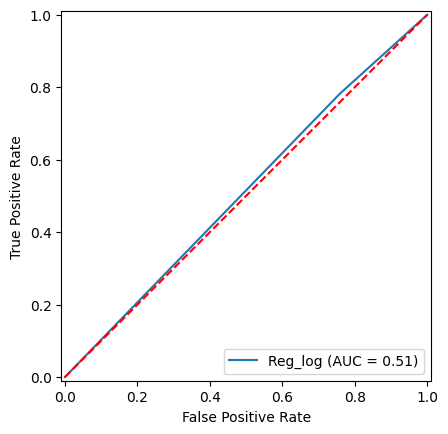

In [51]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

A primera vista, pareciera que la regresión logística funciona apenas mejor que adivinar al azar

In [52]:
# Repetimos pero partiendo la base entre train y test:
train = smarket[smarket.Year < 2005]
test = smarket[smarket.Year >= 2005]
    
ytrain = train['Direction']
ytrain = ytrain.replace('Up', 1)
ytrain = ytrain.replace('Down', 0) 

ytest = test['Direction']
ytest = ytest.replace('Up', 1)
ytest = ytest.replace('Down', 0)

Xtrain = train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
Xtrain = sm.add_constant(Xtrain) 

Xtest = test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
Xtest = sm.add_constant(Xtest)

In [53]:
# Regresión logística
logit_model = sm.Logit(ytrain.astype(float),Xtrain.astype(float))
results = logit_model.fit()
print(results.summary2())

# Probabilidades predichas
y_pred = results.predict(Xtest)

# Clasificador de Bayes
y_pred=np.where(y_pred>0.5, 1, y_pred)
y_pred=np.where(y_pred<=0.5, 0, y_pred)

# Matriz de confusión
conf_mat = confusion_matrix(ytest, y_pred) 

print('Confusion Matrix:\n', conf_mat) 
print('Accuracy Score:',accuracy_score(ytest, y_pred)) # Cantidad de (vp+vn) sobre total
# Recordar: acá la matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: Direction        Pseudo R-squared: 0.002    
Date:               2024-05-08 18:15 AIC:              1395.1052
No. Observations:   998              BIC:              1429.4454
Df Model:           6                Log-Likelihood:   -690.55  
Df Residuals:       991              LL-Null:          -691.63  
Converged:          1.0000           LLR p-value:      0.90440  
No. Iterations:     4.0000           Scale:            1.0000   
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
const      0.1912     0.3337    0.5730   0.5666   -0.4628   0.8452
Lag1      -0.0542     0.0518   -1.0462   0.2955   -0.1557   0.0473
Lag

También vamos a usar LDA

In [54]:
# LDA
lda = LDA()
lda.fit(Xtrain, ytrain)
results_lda = lda.predict(Xtest)

# Probabilidades
y_pred_lda = pd.Series(results_lda.tolist())

# Matriz de resultados
conf_mat2 = confusion_matrix(ytest, y_pred_lda)
print(conf_mat2)   

[[77 34]
 [97 44]]


AUC logit: 0.50


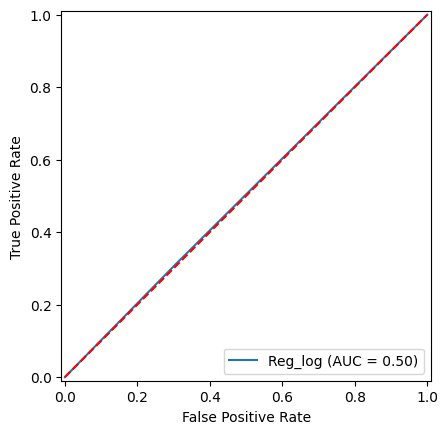

In [55]:
# AUC y ROC
auc = roc_auc_score(ytest, y_pred)
print('AUC logit: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(ytest, y_pred)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

In [56]:
auc_lda = roc_auc_score(ytest, y_pred_lda)
print('AUC LDA: %.2f' % auc_lda)
fpr, tpr, thresholds = roc_curve(ytest, y_pred_lda)


AUC LDA: 0.50
